# 1. EDA

# (1) 데이터 불러오기

In [255]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [256]:
data = pd.read_csv('./CVD_cleaned.csv')

data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# (2) 데이터 확인하기

In [121]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

- 결측치는 없음

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

- 약 30만 개 데이터

#### 각 column과 heart disease와의 관계

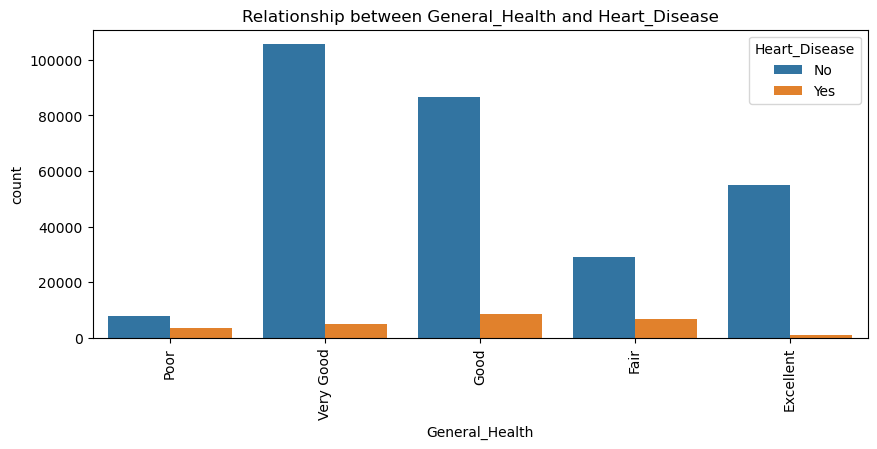

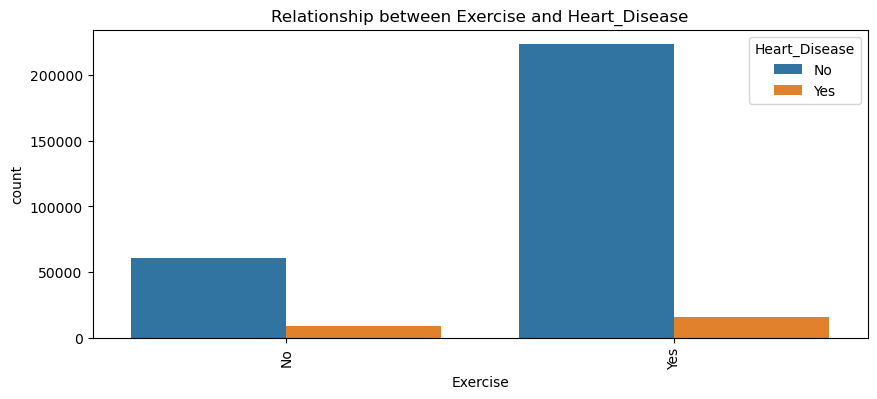

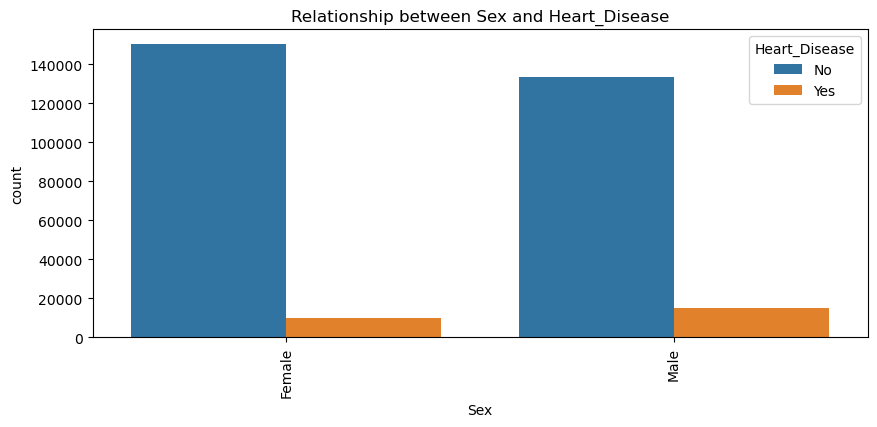

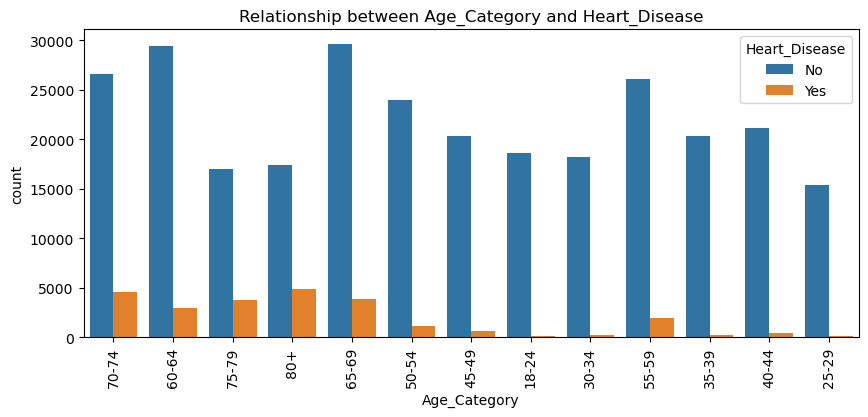

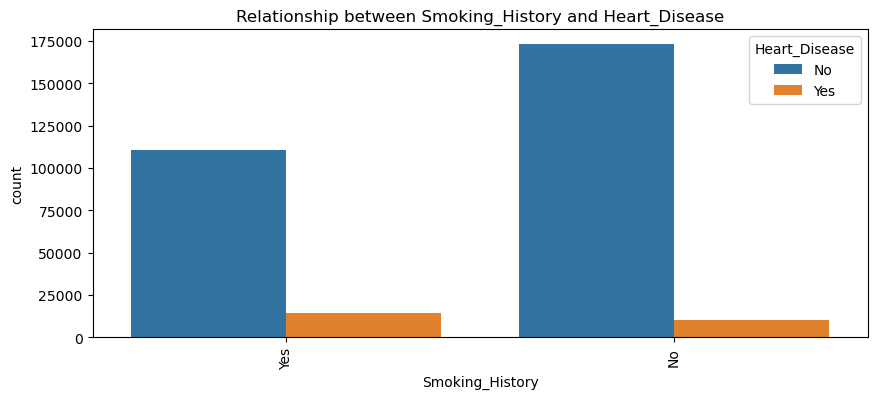

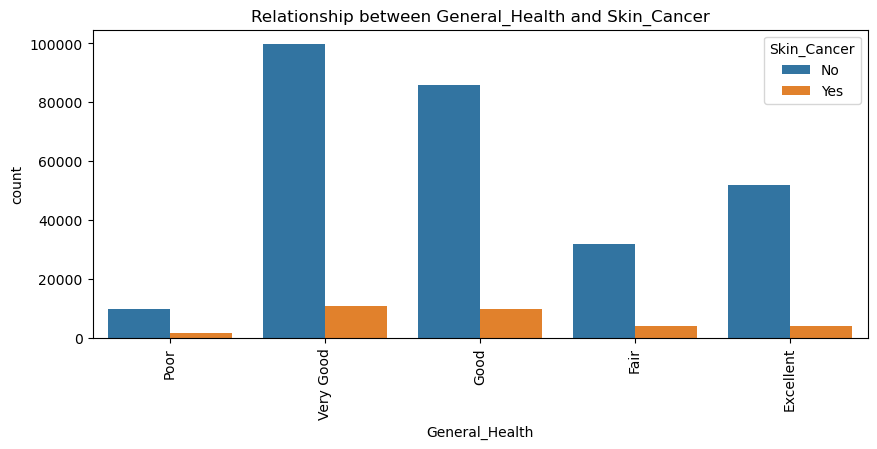

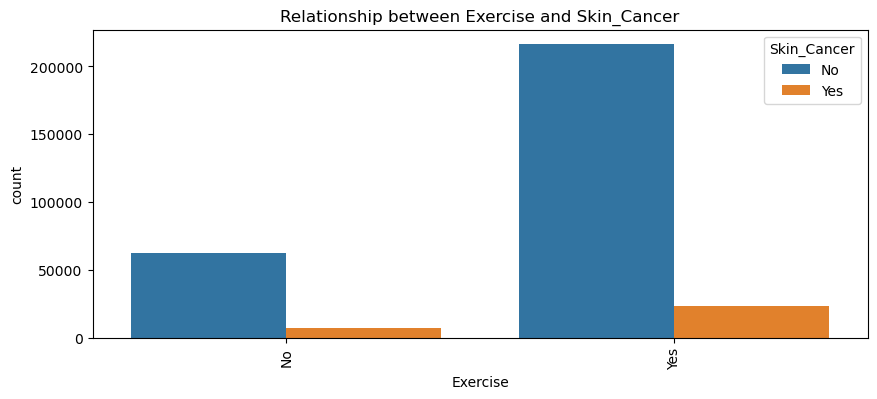

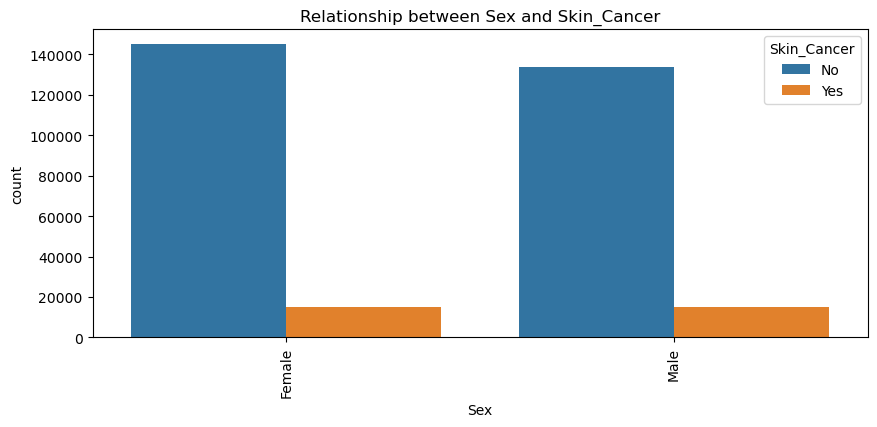

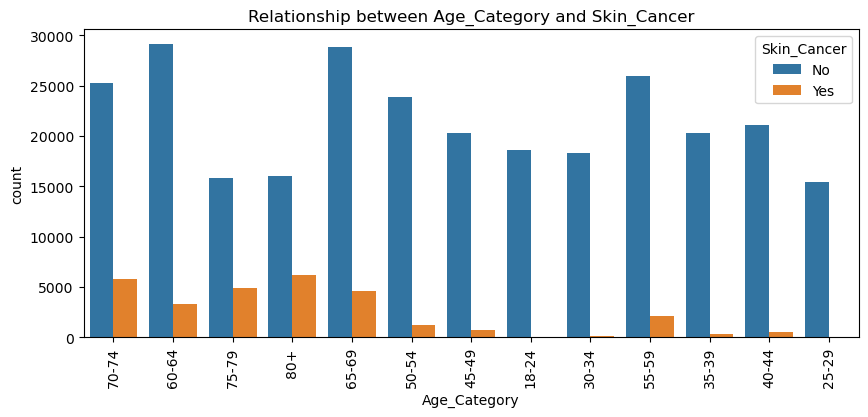

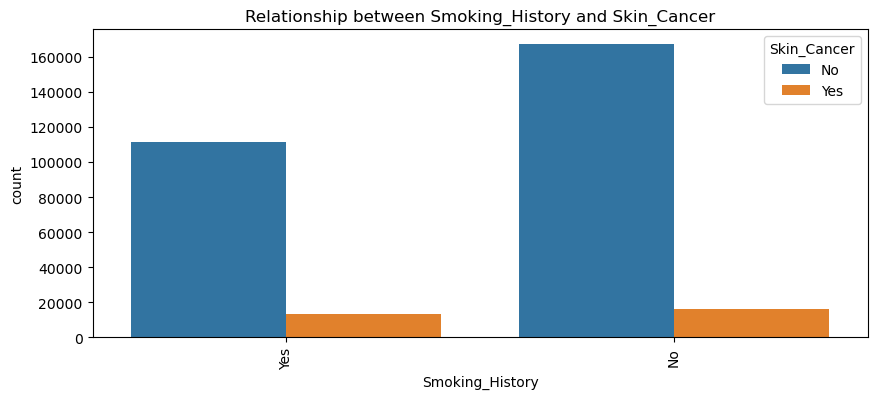

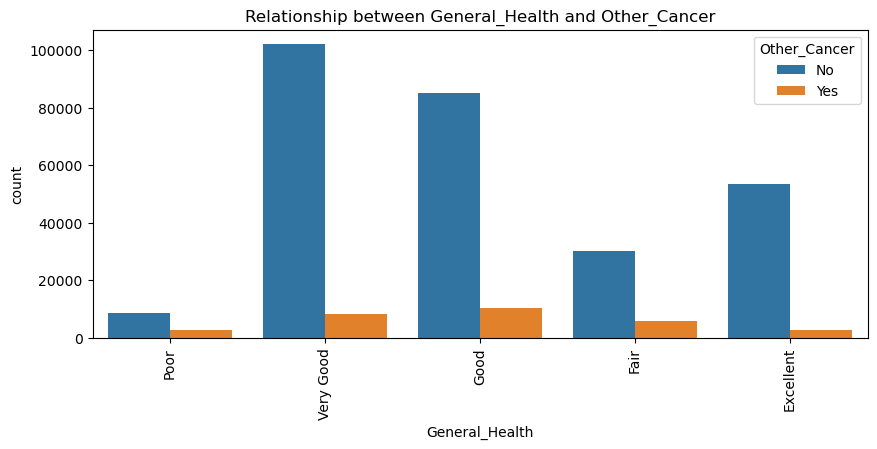

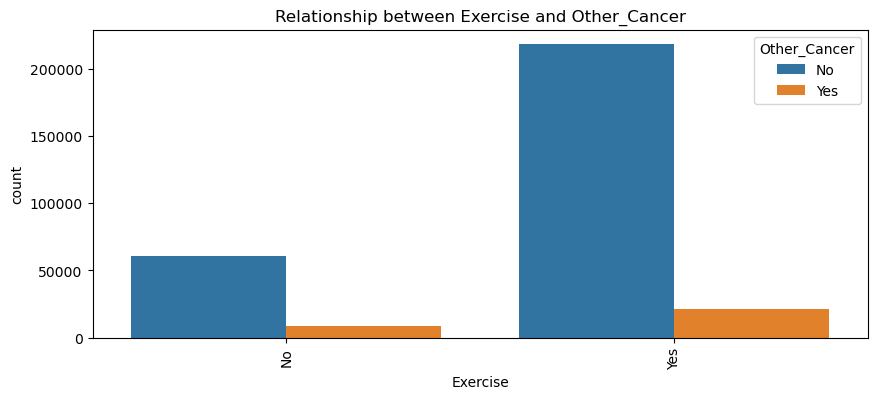

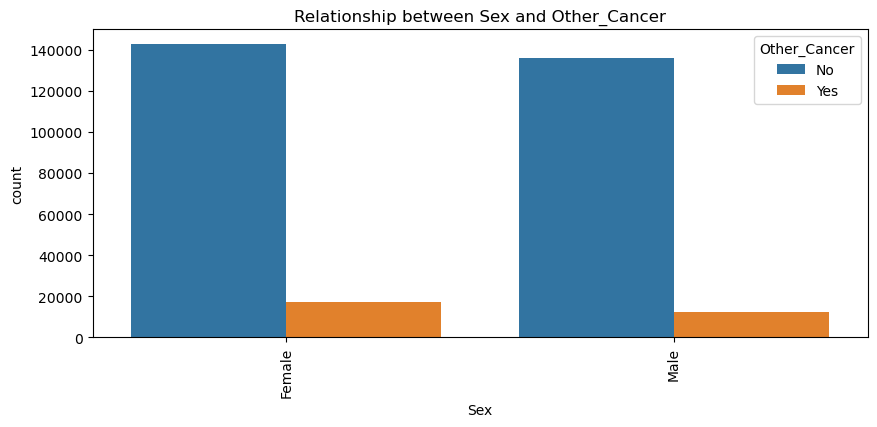

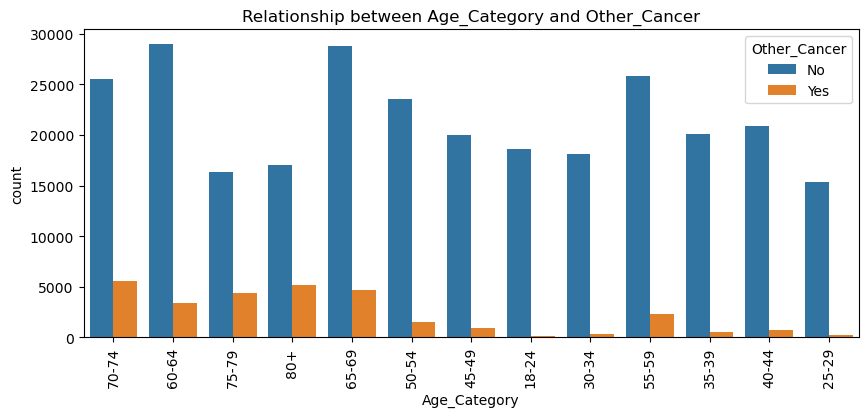

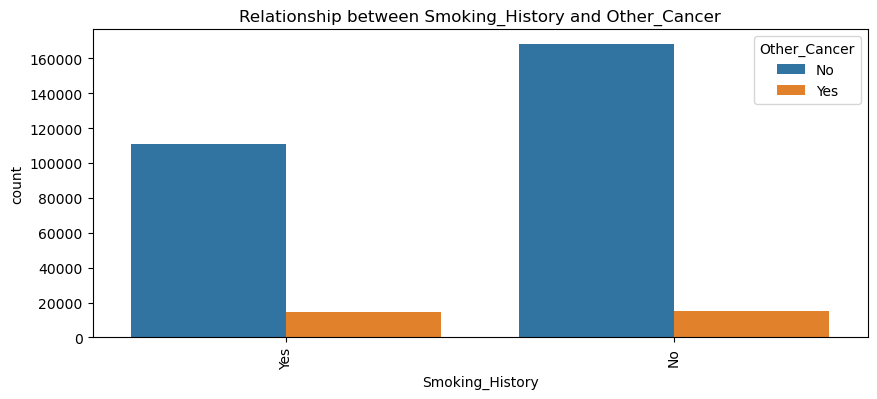

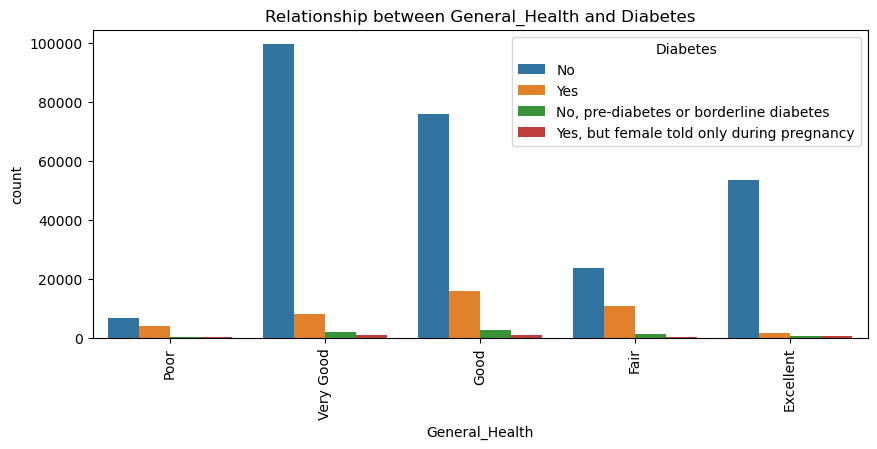

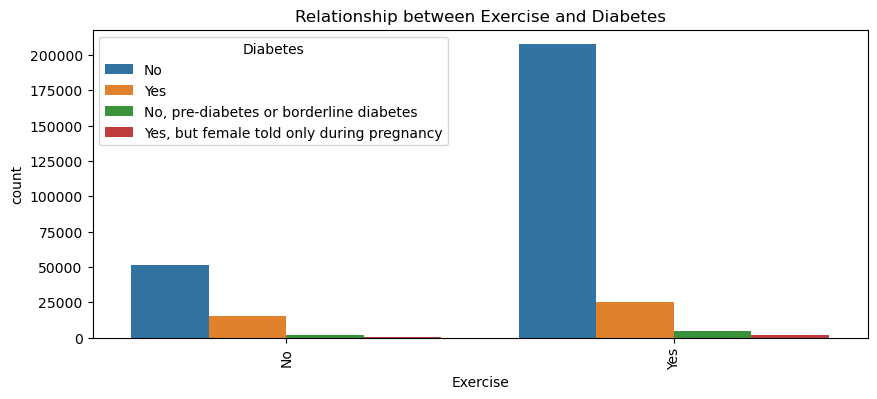

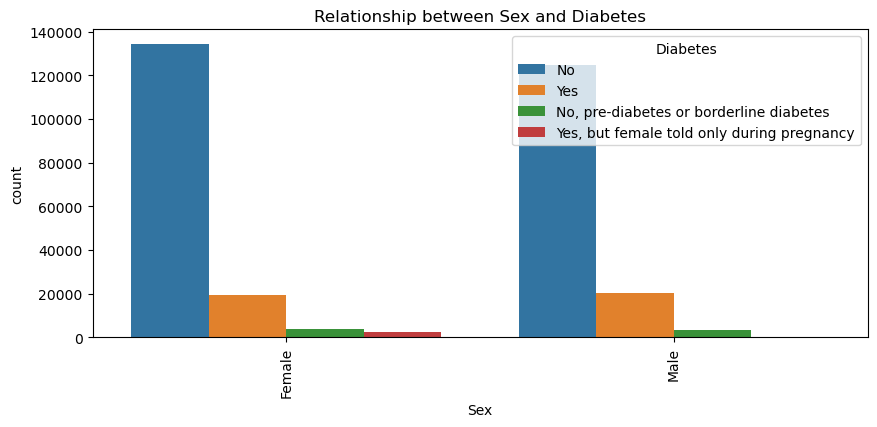

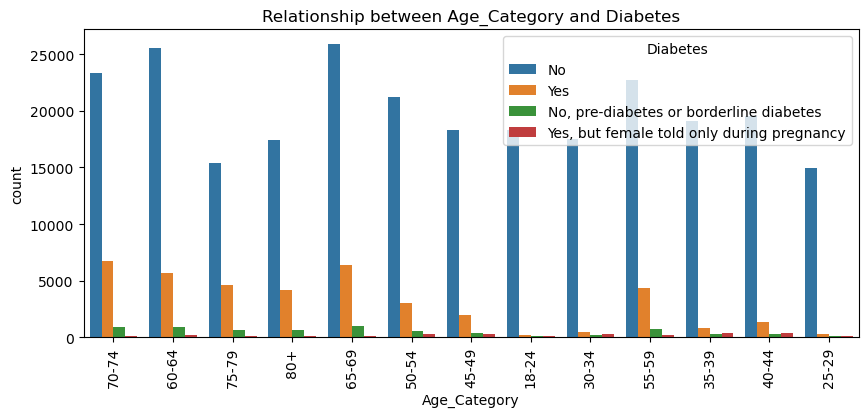

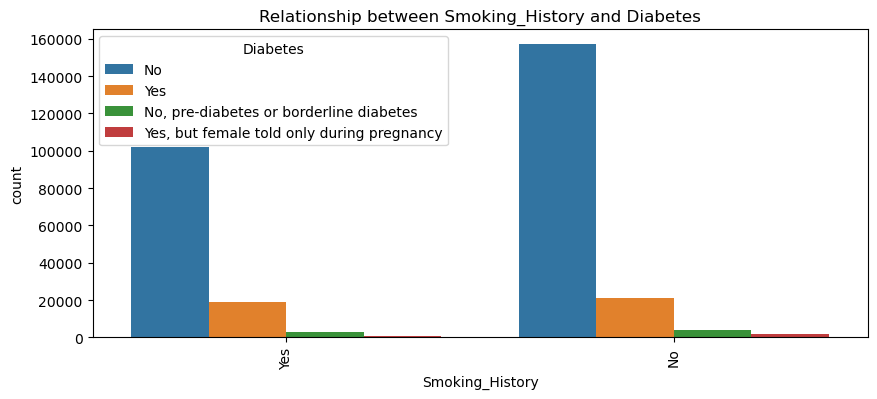

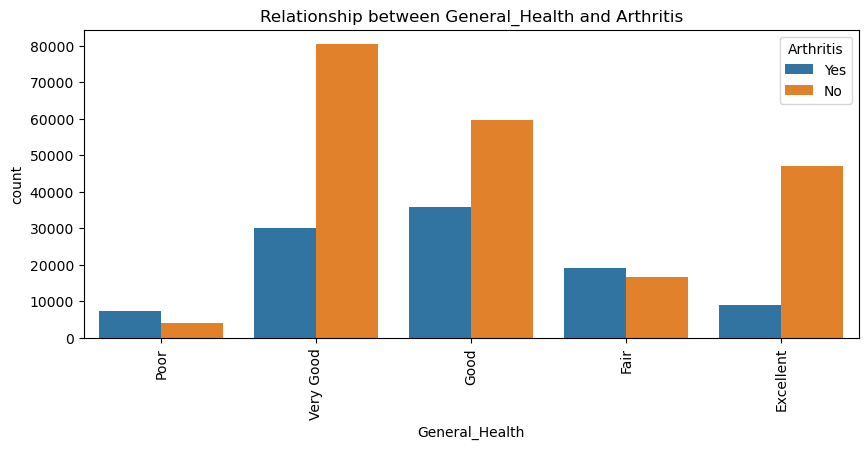

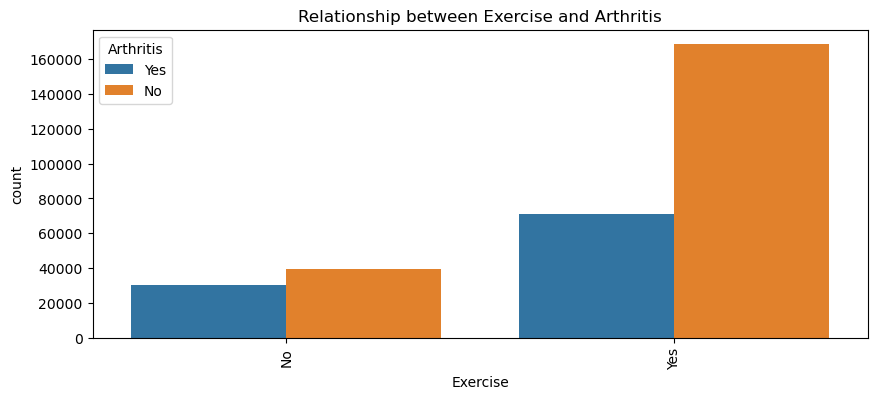

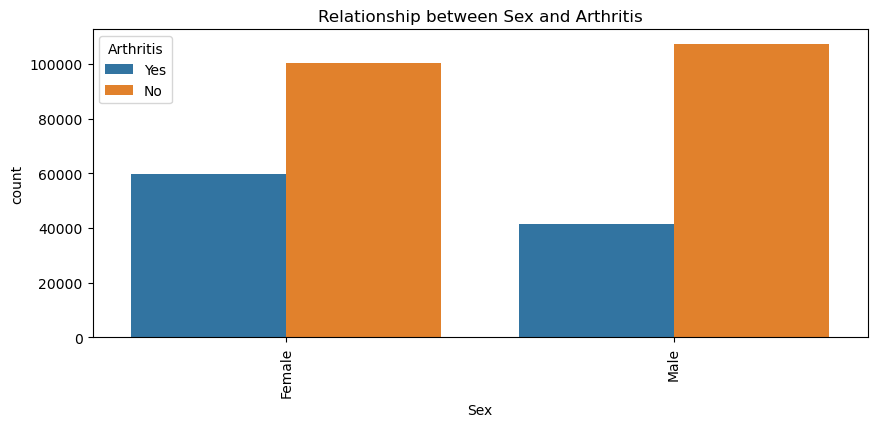

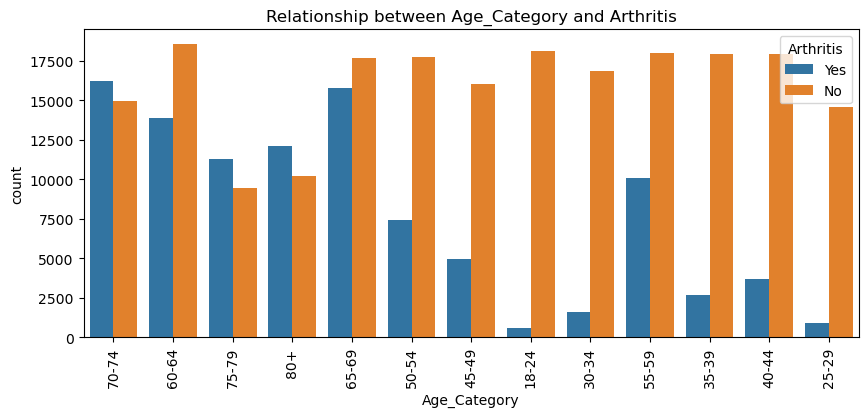

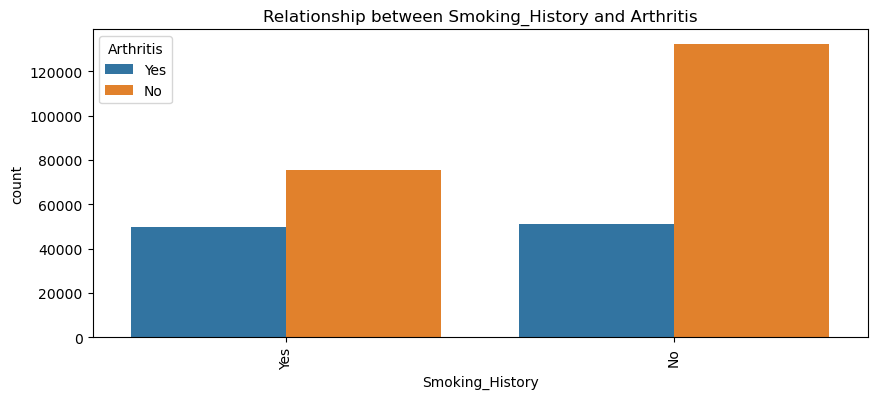

In [123]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 
                      'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                      'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

In [124]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

#### 나이대 구분 - 10살 기준으로 바꾸기

In [125]:
a = data['Age_Category'].values
set(a)

{'18-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80+'}

In [257]:
data.loc[(data['Age_Category']=='18-24') | (data['Age_Category']=='25-29'), 'Age_Category'] = '18-29'
data.loc[(data['Age_Category']=='30-34') | (data['Age_Category']=='35-39'), 'Age_Category'] = '30-39'
data.loc[(data['Age_Category']=='40-44') | (data['Age_Category']=='45-49'), 'Age_Category'] = '40-49'
data.loc[(data['Age_Category']=='50-54') | (data['Age_Category']=='55-59'), 'Age_Category'] = '50-59'
data.loc[(data['Age_Category']=='60-64') | (data['Age_Category']=='65-69'), 'Age_Category'] = '60-69'
data.loc[(data['Age_Category']=='70-74') | (data['Age_Category']=='75-79'), 'Age_Category'] = '70-79'

In [127]:
a = data['Age_Category'].values
set(a)

{'18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'}

#### 범주형 데이터 정리

- 범주형 데이터 중 성별은 원핫인코딩, 나머지는 직접 mapping
- Yes, No 답변 column: 1, 0으로 변환

In [258]:
# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)

# {'18-29', '30-39', '40-49', '50-59', '60-69', '75-79', '80+'}
age_category_mapping = {
    '18-29': 0,
    '30-39': 1,
    '40-49': 2,
    '50-59': 3,
    '60-69': 4,
    '70-79': 5,
    '80+': 6
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,3,0,0,0,0,0,0,1,5,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4,0,1,0,0,0,1,0,5,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4,1,0,0,0,0,1,0,4,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4,1,1,0,0,0,1,0,5,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4,0,0,0,0,0,0,0,6,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


In [129]:
# Remove duplicate rows
data = data.drop_duplicates()

## Correlation matrix

### 전체 상관관계

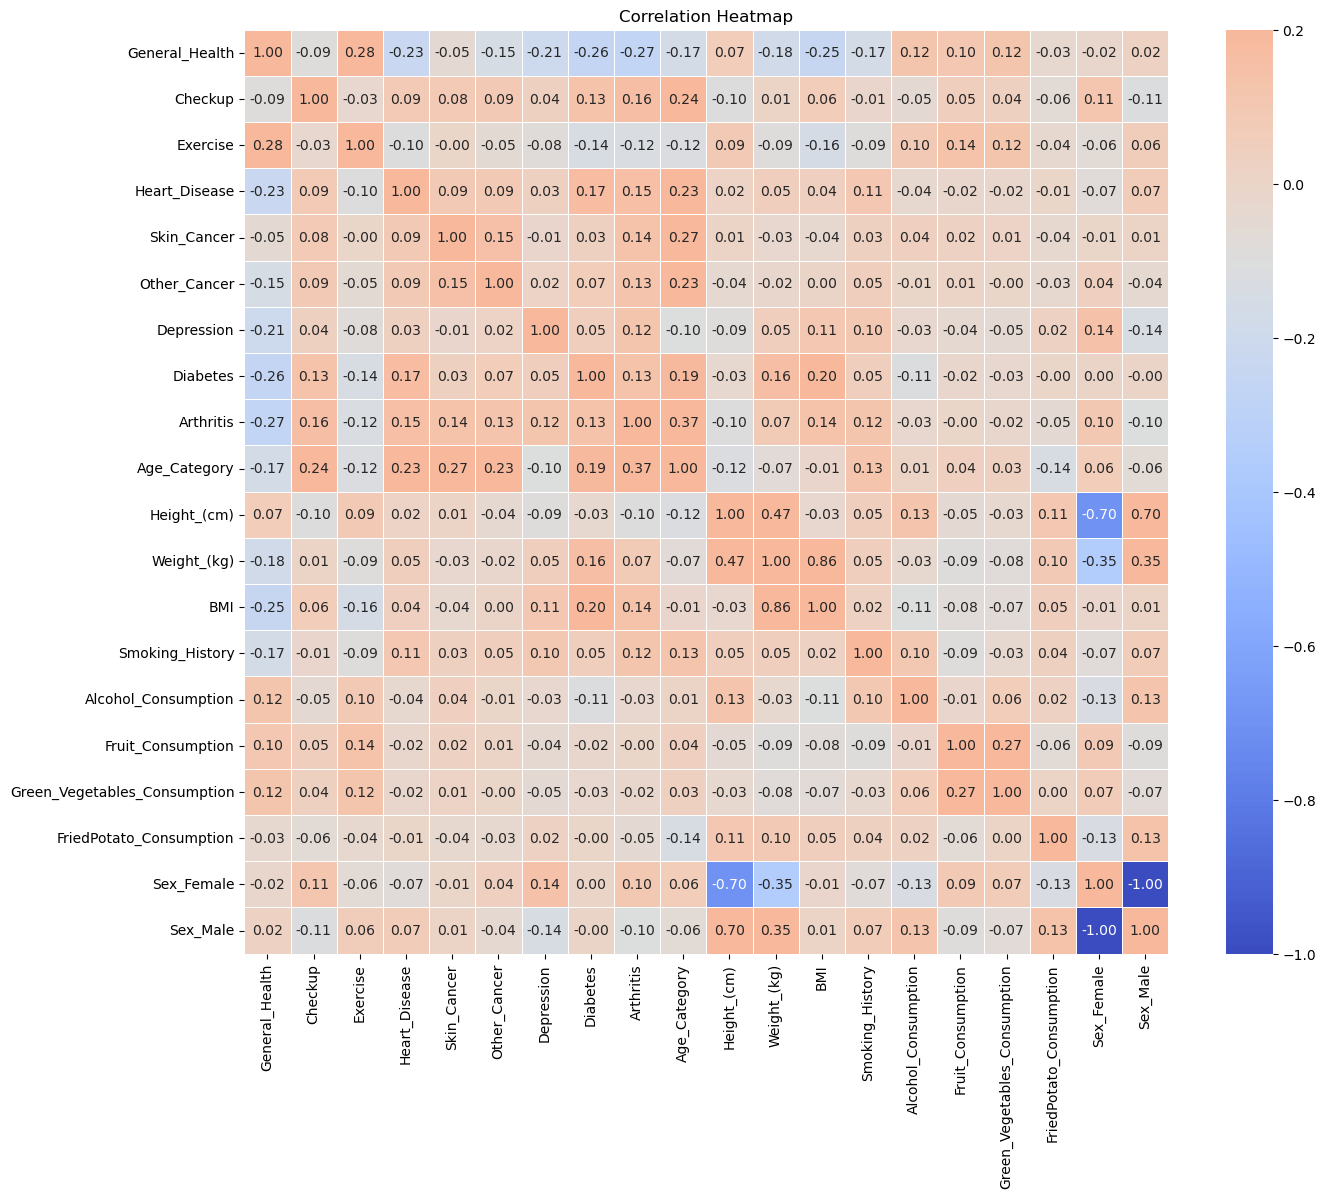

In [130]:
corr = data.corr()

# generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap='coolwarm', center=-0.1, vmax=.2,
            square=True, linewidths=.5, annot=True, fmt='.2f')  # fmt: 나타나는 숫자 반올림

plt.title('Correlation Heatmap')
plt.show()

## 심장병과 나머지 요인과의 상관관계

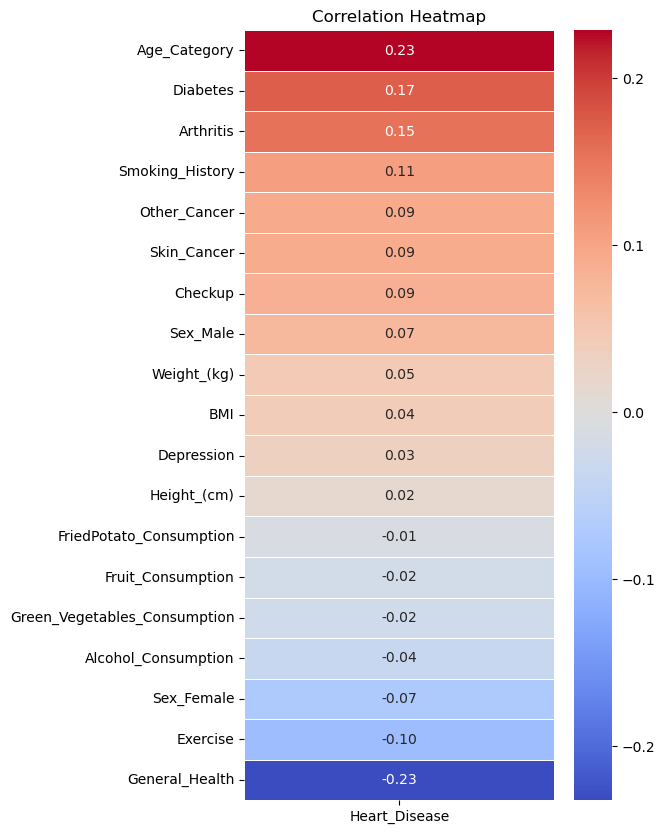

In [259]:
corr = data.corr()

plt.figure(figsize=(5, 10))

target = corr['Heart_Disease'].drop('Heart_Disease', axis=0)
target_sorted = target.sort_values(ascending=False)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(target_sorted.to_frame(), cmap='coolwarm', linewidths=.5, annot=True, fmt='.2f')  # fmt: 나타나는 숫자 반올림

plt.title('Correlation Heatmap')
plt.show()

절댓값 0.1 이상
- 양의 상관관계: Diabetes(0.17), Arthritics(0.15), Age_Category(0.23), Smoking_History(0.11)
- 음의 상관관계: General_Health(-0.23)

## outlier

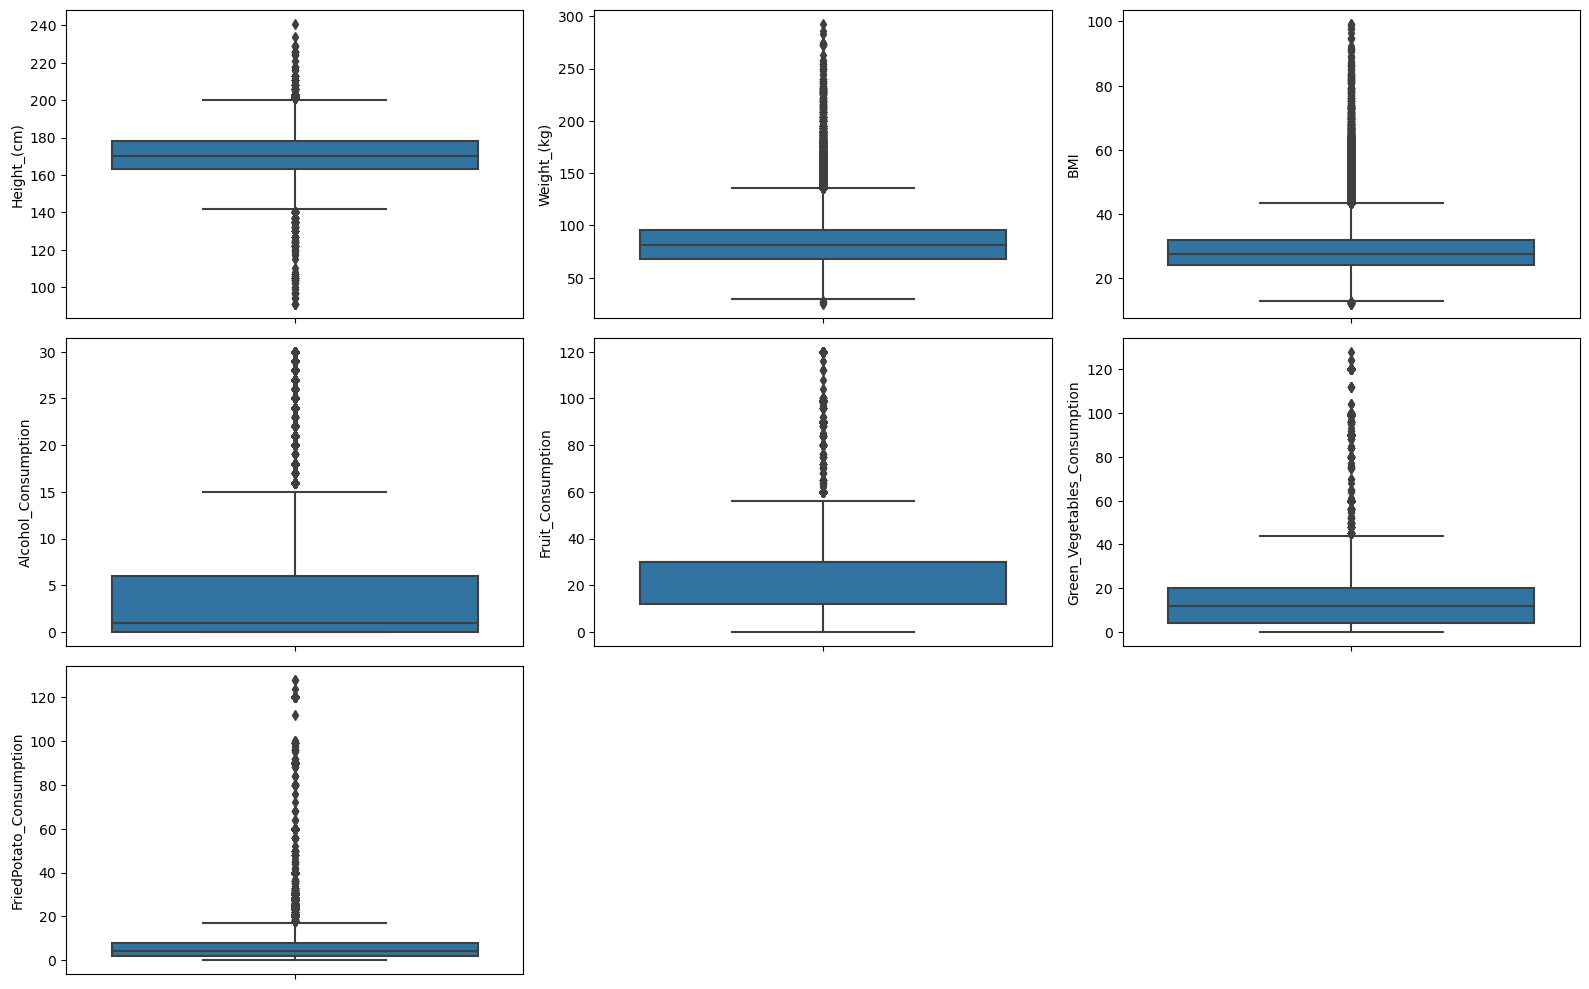

In [133]:
# 수치형 데이터
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=raw_data[column])

plt.tight_layout()

- weight와 bmi에서 outlier가 많이 보인다. 

### BMI outlier 제거

In [260]:
def get_outlier(df=None, weight=1.5):
    quantile_25 = np.percentile(df.BMI, 25)
    quantile_75 = np.percentile(df.BMI, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = df[(df.BMI < lowest_val) | (df.BMI > highest_val)].index

    return outlier_index

In [261]:
get_outlier(df=data, weight=1.5)

Index([     5,     15,     29,     48,    150,    246,    271,    310,    352,
          454,
       ...
       308539, 308560, 308565, 308598, 308609, 308632, 308642, 308660, 308679,
       308825],
      dtype='int64', length=9530)

In [137]:
np.percentile(data.BMI, 75)

31.87

weight=1.5로 하면 이상치 9530개. 

In [262]:
get_outlier(df=data, weight=2.5)

Index([   271,    545,    647,   1022,   1047,   1099,   1106,   1202,   1373,
         1477,
       ...
       307603, 307633, 307843, 307901, 307954, 308218, 308560, 308565, 308598,
       308660],
      dtype='int64', length=2401)

weight=2.5로 하면 이상치 2401개. 

In [141]:
data.loc[545]

General_Health                    1.00
Checkup                           4.00
Exercise                          1.00
Heart_Disease                     0.00
Skin_Cancer                       0.00
Other_Cancer                      0.00
Depression                        1.00
Diabetes                          0.00
Arthritis                         1.00
Age_Category                      4.00
Height_(cm)                     175.00
Weight_(kg)                     158.76
BMI                              51.69
Smoking_History                   0.00
Alcohol_Consumption               0.00
Fruit_Consumption                30.00
Green_Vegetables_Consumption      3.00
FriedPotato_Consumption          20.00
Sex_Female                        1.00
Sex_Male                          0.00
Name: 545, dtype: float64

우선 weight=2.5로 학습해보기

#### outlier 삭제

In [263]:
outlier_index = get_outlier(df=data, weight=2.5)
data_nooutlier = data.drop(outlier_index, axis=0)

In [264]:
len(data), len(data_nooutlier)

(308854, 306453)

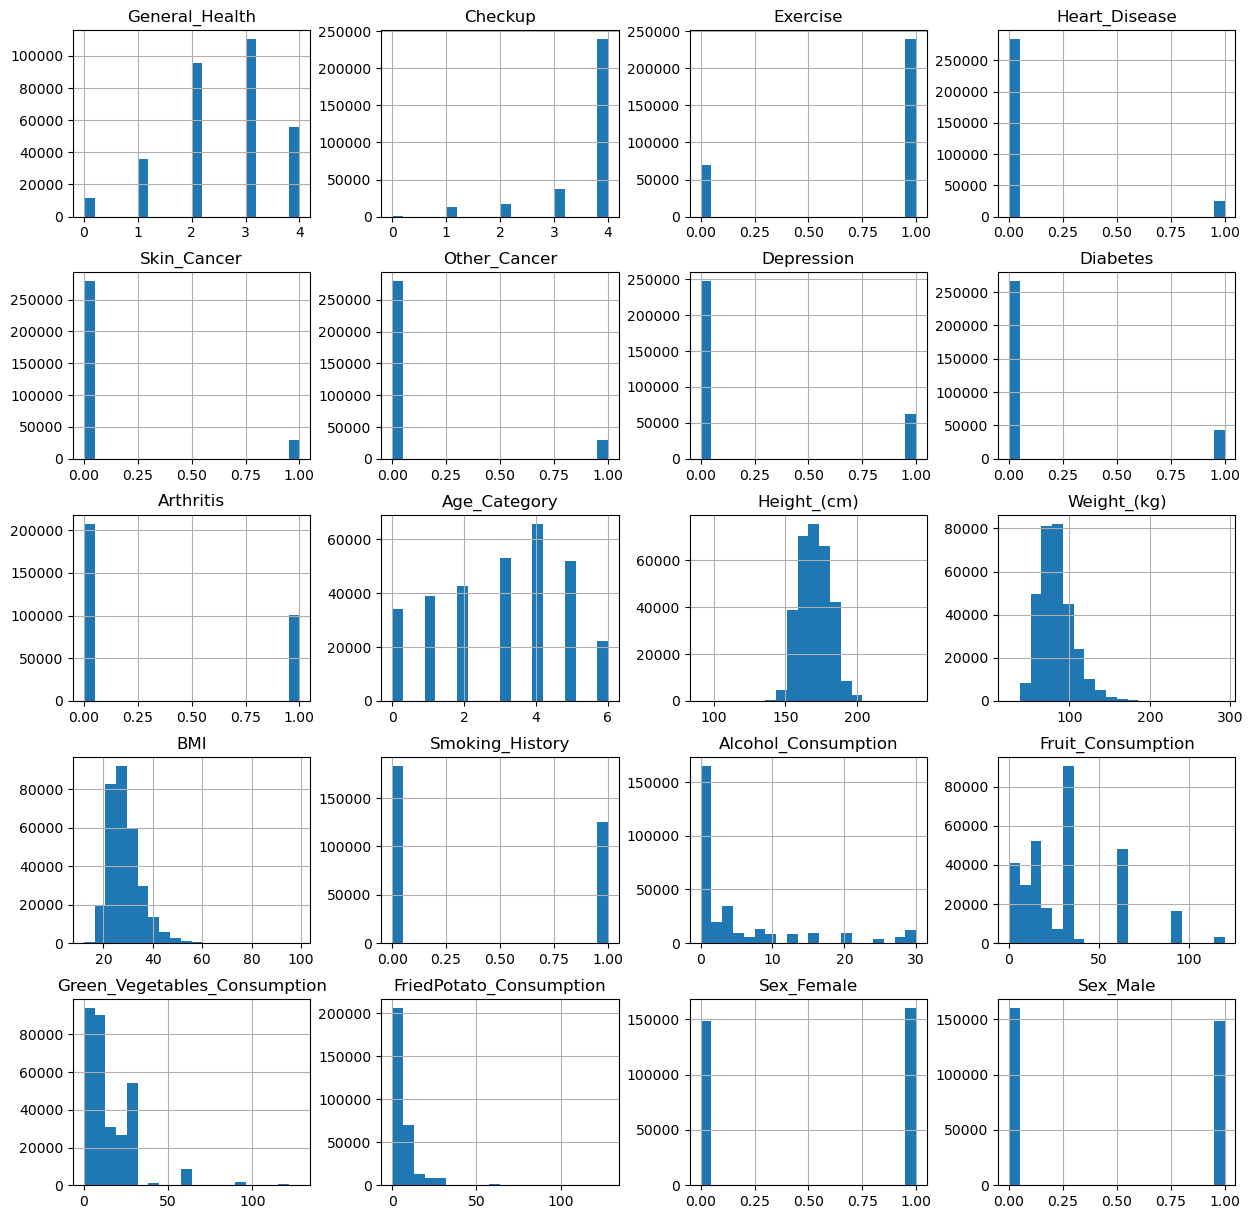

In [269]:
data.hist(bins=20, figsize=(15, 15))
plt.show()

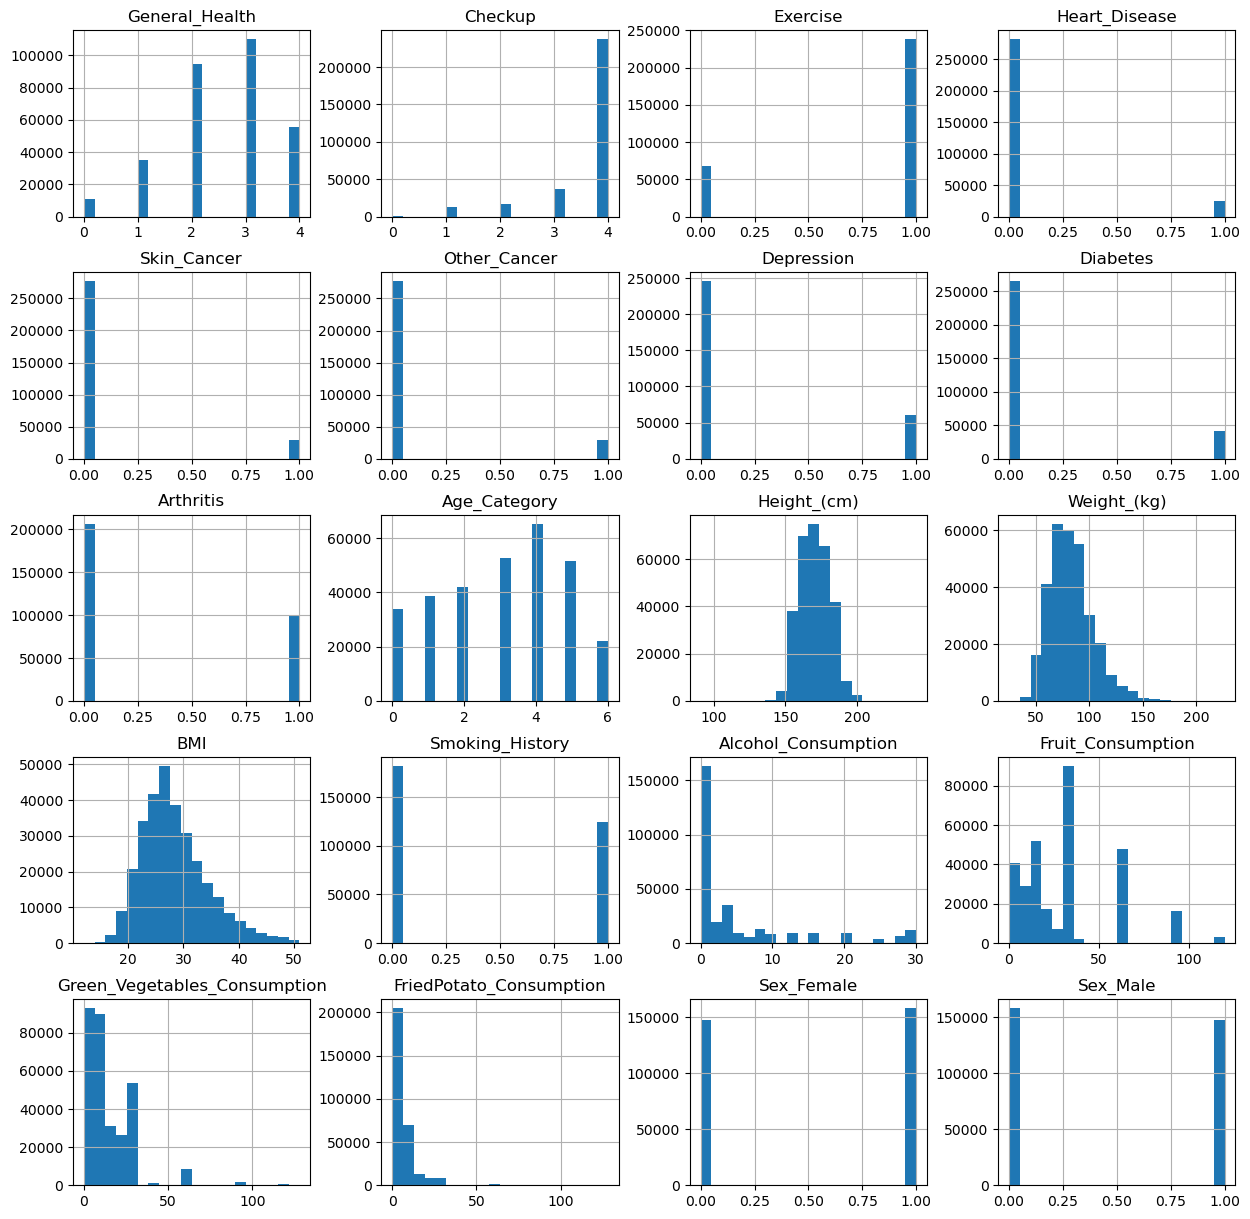

In [270]:
data_nooutlier.hist(bins=20, figsize=(15, 15))
plt.show()

#### 가중치 조정

- 양의 상관관계: Diabetes(0.17), Arthritics(0.15), Age_Category(0.23), Smoking_History(0.11)
- 음의 상관관계: General_Health(-0.23)

In [144]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [145]:
data2 = data.copy()
data2['Diabetes'] = data2['Diabetes']*1.5
data2['Arthritis'] = data2['Arthritis']*1.5
data2['Age_Category'] = data2['Age_Category']*1.5
data2['Smoking_History'] = data2['Smoking_History']*1.5
data2['General_Health'] = data2['General_Health']*1.5

## 각 모델 평가 함수

In [271]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# from imblearn.under_sampling import TomekLinks

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# 모델 평가 
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, precision_recall_curve, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

from sklearn.model_selection import learning_curve


def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pre):
    confusion = confusion_matrix(y_test, pre)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pre)

    print('===> Confusion matrix')
    print(confusion)
    print('======================')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

# 모델과 데이터를 주면 성능 출력
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 4개의 분류 모델을 한 번에 표로 정리
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

## split

- oversampling: SMOTE
- scaler: MinMaxScaler

In [318]:
X = data_nooutlier.drop('Heart_Disease', axis=1)
y = data_nooutlier['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [320]:
X_raw = data.drop('Heart_Disease', axis=1)
y_raw = data['Heart_Disease']
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=13, stratify=y_raw)

#### X 에 scaler 적용

In [273]:
scaler = StandardScaler()

In [321]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [322]:
X_train_raw_scaled = scaler.fit_transform(X_train_raw)
X_test_raw_scaled = scaler.transform(X_test_raw)

## LogisticRegression

In [275]:
lr_clf = LogisticRegression(random_state=13, 
                            class_weight='balanced',
                            solver='liblinear')
lr_clf.fit(X_train_scaled, y_train)
lr_pred = lr_clf.predict(X_test_scaled)

print_clf_eval(y_test, lr_pred)

===> Confusion matrix
[[41336 15007]
 [ 1061  3887]]
Accuracy: 0.7378, Precision: 0.2057
Recall: 0.7856, F1: 0.3261, AUC: 0.7596


In [ ]:
params = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,1000]
}

grid_cv = GridSearchCV(lf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

## DecisionTree

In [276]:
dt_clf = DecisionTreeClassifier(random_state=13, 
                                class_weight='balanced',
                                max_depth=4)
dt_clf.fit(X_train_scaled, y_train)
dt_pred = dt_clf.predict(X_test_scaled)

print_clf_eval(y_test, dt_pred)

===> Confusion matrix
[[38251 18092]
 [  896  4052]]
Accuracy: 0.6902, Precision: 0.1830
Recall: 0.8189, F1: 0.2991, AUC: 0.7489


## RandomForest

In [324]:
# outlier 제거 전
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
rf_clf.fit(X_train_raw_scaled, y_train_raw)
rf_pred = rf_clf.predict(X_test_raw_scaled)

print_clf_eval(y_test_raw, rf_pred)

===> Confusion matrix
[[56510   267]
 [ 4753   241]]
Accuracy: 0.9187, Precision: 0.4744
Recall: 0.0483, F1: 0.0876, AUC: 0.5218


In [325]:
# outlier 제거 후
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

print_clf_eval(y_test, rf_pred)

===> Confusion matrix
[[56036   307]
 [ 4756   192]]
Accuracy: 0.9174, Precision: 0.3848
Recall: 0.0388, F1: 0.0705, AUC: 0.5167


### GridSearch

In [326]:
params = {
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [8, 12],
    'min_samples_split': [8, 12]
}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [327]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators',
              'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split']

cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth,param_min_samples_leaf,param_min_samples_split
45,1,0.919514,50,10,12,12
42,1,0.919514,50,10,12,8
46,3,0.919494,100,10,12,12
43,3,0.919494,100,10,12,8
47,5,0.919465,200,10,12,12


### GridSearch 결과 적용

In [328]:
rf_clf = RandomForestClassifier(random_state=13, 
                                n_estimators=50,
                                max_depth=10,
                                min_samples_leaf=12,
                                min_samples_split=12,
                                n_jobs=-1,
                                class_weight='balanced')
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

print_clf_eval(y_test, rf_pred)

===> Confusion matrix
[[41150 15193]
 [ 1053  3895]]
Accuracy: 0.7349, Precision: 0.2041
Recall: 0.7872, F1: 0.3241, AUC: 0.7588


## LightGBM

In [330]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                            boost_from_average=False,
                            class_weight='balanced')
lgbm_clf.fit(X_train_raw_scaled, y_train_raw)
lgbm_pred = lgbm_clf.predict(X_test_raw_scaled)

print_clf_eval(y_test_raw, lgbm_pred)

===> Confusion matrix
[[45950 10827]
 [ 1888  3106]]
Accuracy: 0.7942, Precision: 0.2229
Recall: 0.6219, F1: 0.3282, AUC: 0.7156


In [332]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                            boost_from_average=False,
                            class_weight='balanced')
lgbm_clf.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_clf.predict(X_test_scaled)

print_clf_eval(y_test, lgbm_pred)

===> Confusion matrix
[[45435 10908]
 [ 1775  3173]]
Accuracy: 0.7931, Precision: 0.2253
Recall: 0.6413, F1: 0.3335, AUC: 0.7238


### GridSearch

In [334]:
params = {
    'n_estimators': [200, 1000, 2000, 3000],
    'num_leaves': [32, 64, 128]
}

grid_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [335]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_num_leaves']

cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_num_leaves
11,1,0.905169,3000,128
8,2,0.898810,2000,128
10,3,0.885712,3000,64
5,4,0.873724,1000,128
7,5,0.868507,2000,64


### GridSearch 결과 적용

In [336]:
lgbm_clf = LGBMClassifier(n_estimators=3000, num_leaves=128, n_jobs=-1, 
                            boost_from_average=False,
                            class_weight='balanced')
lgbm_clf.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_clf.predict(X_test_scaled)

print_clf_eval(y_test, lgbm_pred)

===> Confusion matrix
[[52911  3432]
 [ 3644  1304]]
Accuracy: 0.8846, Precision: 0.2753
Recall: 0.2635, F1: 0.2693, AUC: 0.6013


## XGBoost

In [343]:
xgb_clf = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    n_estimators=400,
    learning_rate=0.1, max_depth=3
)

xgb_clf.fit(X_train_raw_scaled, y_train_raw)
xgb_pred = xgb_clf.predict(X_test_raw_scaled)

print_clf_eval(y_test_raw, xgb_pred)

===> Confusion matrix
[[41013 15764]
 [ 1013  3981]]
Accuracy: 0.7284, Precision: 0.2016
Recall: 0.7972, F1: 0.3218, AUC: 0.7598


In [357]:
xgb_clf = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    n_estimators=400,
    learning_rate=0.1, max_depth=3
)

xgb_clf.fit(X_train_scaled, y_train)
xgb_pred = xgb_clf.predict(X_test_scaled)

print_clf_eval(y_test, xgb_pred)

===> Confusion matrix
[[40777 15566]
 [  991  3957]]
Accuracy: 0.7299, Precision: 0.2027
Recall: 0.7997, F1: 0.3234, AUC: 0.7617


### GridSearch

In [346]:
params={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,10]
}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [351]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_learning_rate', 'param_max_depth']

cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_learning_rate,param_max_depth
44,1,0.870249,500,0.1,10
43,2,0.860366,400,0.1,10
42,3,0.848047,300,0.1,10
29,4,0.837405,500,0.05,10
41,5,0.829937,200,0.1,10


### GridSearch 결과 적용

In [356]:
xgb_clf = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    n_estimators=500,
    learning_rate=0.1, max_depth=10
)

xgb_clf.fit(X_train_scaled, y_train)
xgb_pred = xgb_clf.predict(X_test_scaled)

print_clf_eval(y_test, xgb_pred)

===> Confusion matrix
[[48723  7620]
 [ 2541  2407]]
Accuracy: 0.8342, Precision: 0.2401
Recall: 0.4865, F1: 0.3215, AUC: 0.6756


In [360]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf, xgb_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

In [247]:
# outlier 적용 전
# GridSearch는 다시 해봐야함
result

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.736614,0.207741,0.783515,0.328408,0.757965
DecisionTree,0.690157,0.184765,0.811718,0.301013,0.745494
RandomForest,0.734133,0.206429,0.785700,0.326956,0.757608
LightGBM,0.886663,0.293148,0.268520,0.280294,0.605270
XGBoost,0.725433,0.203104,0.800596,0.324009,0.759649


In [361]:
# outlier 적용 후
result

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.737890,0.205728,0.785368,0.326048,0.759544
DecisionTree,0.690199,0.182984,0.818917,0.299129,0.748906
RandomForest,0.734904,0.204034,0.787187,0.324070,0.758750
LightGBM,0.884714,0.272844,0.257074,0.264724,0.598453
XGBoost,0.729862,0.202684,0.799717,0.323403,0.761722


In [248]:
def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0, 1], [0, 1], 'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

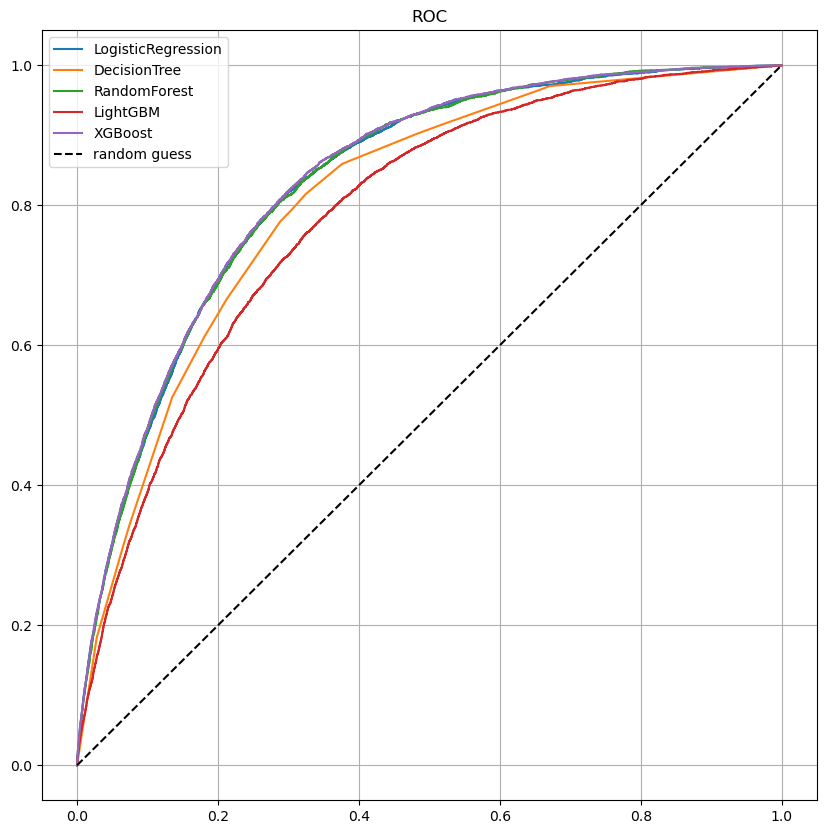

In [249]:
draw_roc_curve(models, model_names, X_test, y_test)

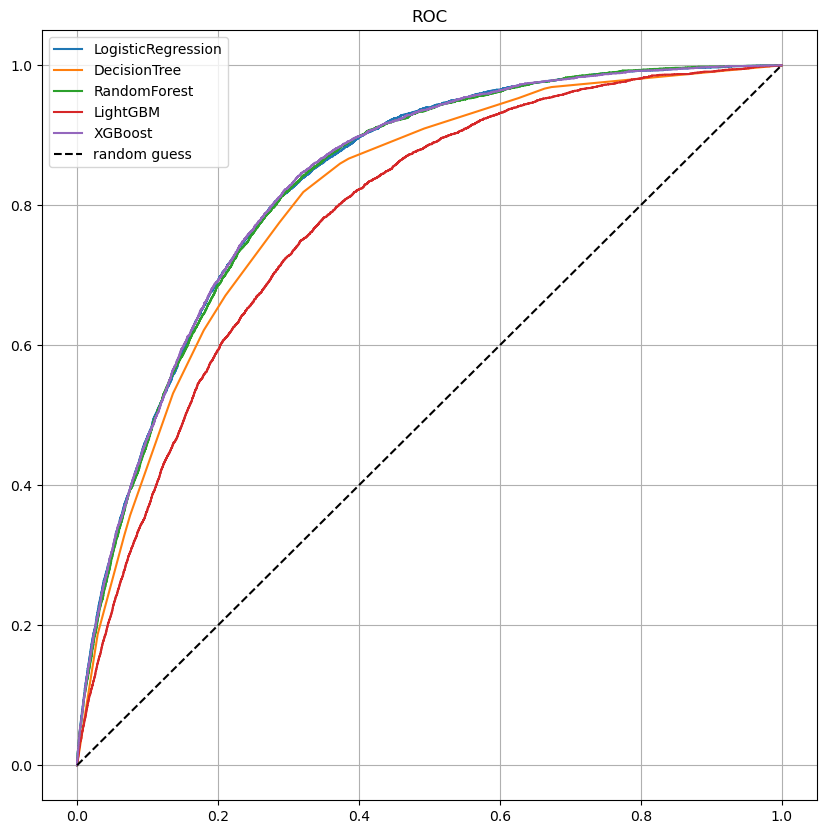

In [362]:
draw_roc_curve(models, model_names, X_test, y_test)

## 분석중

In [199]:
'''
# scale_pos_weight: 양성 클래스의 가중치 설정. 음성 클래스의 샘플 수/양성 클래스의 샘플 수
# --> 양성 클래스에 대한 민감도 높아짐. 양성 클래스의 샘플 수가 음성보다 현저히 적을 때 사용
xgb_model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), 
                      eval_metric='logloss', # 이진분류 수행 능력 평가
                      use_label_encoder=False # warning 무시
)

# scaler
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler
pipeline = Pipeline([('RobuseScale', scaler), ('SMOTE', resampling), ('Model', xgb_model)])
# Train
xgb_model.fit(X_train, y_train)

# test
y_pred = xgb_model.predict(X_test)
y_score = xgb_model.predict_proba(X_test)[:,1]
'''

confusion matrix

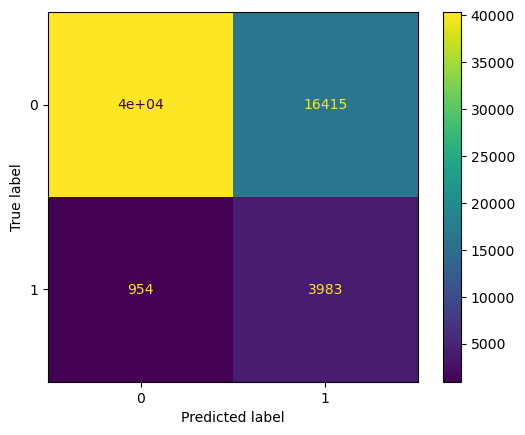

In [201]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=xgb_model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

ROC curve

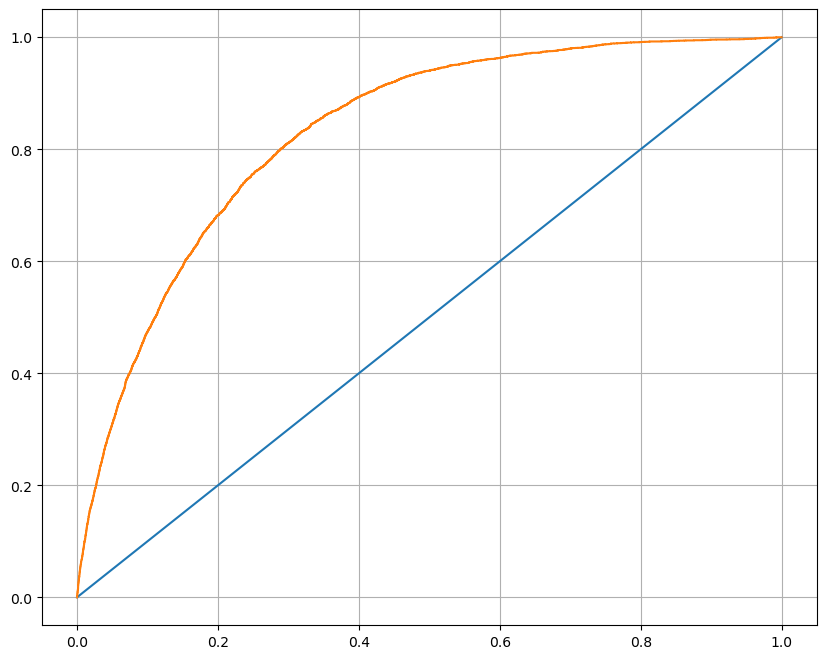

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

pred_proba = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()

### split2 - 상관관계 큰 column만 적용

In [135]:
'''
data2 = data.copy()
data2['Diabetes'] = data2['Diabetes']*1.5
data2['Arthritis'] = data2['Arthritis']*1.5
data2['Age_Category'] = data2['Age_Category']*1.5
data2['Smoking_History'] = data2['Smoking_History']*1.5
data2['General_Health'] = data2['General_Health']*1.5
'''

In [153]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [188]:
# 상관관계 0.1 이상
data2 = data[['Heart_Disease', 'Diabetes', 'Arthritis', 'Age_Category', 'Smoking_History', 'General_Health', 'Sex_Female',
       'Sex_Male', 'Exercise']]

- 성별, depression: 상관관계가 0.1보다 높지는 않지만 넣었더니 FN 내려가서 추가함
- BMI 적용했더니 FN 올라감

In [117]:
# BMI outlier 제거 후 split
X = data2.drop('Heart_Disease', axis=1)
y = data2['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# pipeline
resampling = SMOTE(sampling_strategy='minority')
scaler = RobustScaler()  # outlier 에 영향 적게 받는 scaler 채택

# scale_pos_weight: 양성 클래스의 가중치 설정. 음성 클래스의 샘플 수/양성 클래스의 샘플 수
# --> 양성 클래스에 대한 민감도 높아짐. 양성 클래스의 샘플 수가 음성보다 현저히 적을 때 사용
xgb_model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), 
                      eval_metric='logloss', # 이진분류 수행 능력 평가
                      use_label_encoder=False # warning 무시
)

pipeline = Pipeline([('RobustScale', scaler), ('SMOTE', resampling), ('Model', xgb_model)])

# Train
xgb_model.fit(X_train, y_train)

# test
y_pred = xgb_model.predict(X_test)
y_score = xgb_model.predict_proba(X_test)[:,1]

NameError: name 'data2' is not defined

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82     56756
           1       0.20      0.81      0.31      4937

    accuracy                           0.72     61693
   macro avg       0.59      0.76      0.57     61693
weighted avg       0.91      0.72      0.78     61693



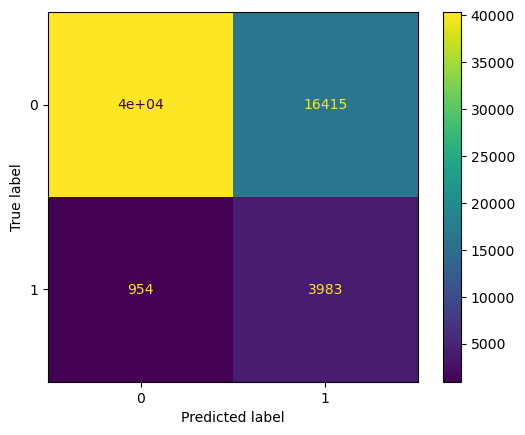

In [191]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=xgb_model.classes_)



# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

plt.rcParams['axes.formatter.useoffset'] = False

# Plot the confusion matrix
disp.plot()
plt.show()

### 추가 분석

In [321]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Define the features and target
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

MMS = MinMaxScaler()
SS = StandardScaler()
RS = RobustScaler()

X_mms = MMS.fit_transform(X)
X_ss = SS.fit_transform(X)
X_rs = RS.fit_transform(X)

X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_rs_pd = pd.DataFrame(X_rs, columns=X.columns)

# Split the data into training and test sets
# X_mms, X_ss, X_rs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [322]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc


In [323]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pre):
    confusion = confusion_matrix(y_test, pre)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pre)

    print('===> Confusion matrix')
    print(confusion)
    print('======================')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

### LogisticRegression

In [344]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, 
                            class_weight='balanced',
                            solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

===> Confusion matrix
[[41583 15191]
 [ 1047  3950]]
Accuracy: 0.7371, Precision: 0.2064
Recall: 0.7905, F1: 0.3273, AUC: 0.7615
CPU times: user 3.42 s, sys: 395 ms, total: 3.81 s
Wall time: 3.16 s


In [345]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     56774
           1       0.21      0.79      0.33      4997

    accuracy                           0.74     61771
   macro avg       0.59      0.76      0.58     61771
weighted avg       0.91      0.74      0.80     61771



#### lr_ipeline

In [297]:
from sklearn.preprocessing import StandardScaler

lr_estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(
                            random_state=13, 
                            class_weight='balanced',
                            solver='liblinear'))]

lr_pipe = Pipeline(lr_estimators)

### DecisionTree

In [325]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, 
                                class_weight='balanced',
                                max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

===> Confusion matrix
[[38662 18112]
 [  968  4029]]
Accuracy: 0.6911, Precision: 0.1820
Recall: 0.8063, F1: 0.2969, AUC: 0.7436
CPU times: user 660 ms, sys: 12.9 ms, total: 672 ms
Wall time: 671 ms


#### dt_pipeline

In [299]:
dt_estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier(
                                random_state=13, 
                                class_weight='balanced',
                                max_depth=4))]

dt_pipe = Pipeline(dt_estimators)

In [346]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     56774
           1       0.18      0.81      0.30      4997

    accuracy                           0.69     61771
   macro avg       0.58      0.74      0.55     61771
weighted avg       0.91      0.69      0.76     61771



### RandomForest

In [265]:
'''
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)
'''

===> Confusion matrix
[[56564   210]
 [ 4826   171]]
Accuracy: 0.9185, Precision: 0.4488
Recall: 0.0342, F1: 0.0636, AUC: 0.5153
CPU times: user 1min 29s, sys: 997 ms, total: 1min 30s
Wall time: 17.5 s


#### GridSearch

In [266]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [8, 12],
    'min_samples_split': [8, 12]
}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators',
              'param_max_depth']

cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
29,1,0.919242,200,10
26,1,0.919242,200,10
27,3,0.919238,50,10
24,3,0.919238,50,10
28,5,0.919238,100,10


--> GridSearchCV 결과 적용

In [326]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, 
                                n_estimators=200,
                                max_depth=10,
                                n_jobs=-1,
                                class_weight='balanced')
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

===> Confusion matrix
[[41489 15285]
 [ 1082  3915]]
Accuracy: 0.7350, Precision: 0.2039
Recall: 0.7835, F1: 0.3236, AUC: 0.7571
CPU times: user 1min 23s, sys: 827 ms, total: 1min 24s
Wall time: 13.3 s


In [347]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84     56774
           1       0.20      0.78      0.32      4997

    accuracy                           0.74     61771
   macro avg       0.59      0.76      0.58     61771
weighted avg       0.91      0.74      0.79     61771



#### rf_pipeline

In [300]:
rf_estimators = [('scaler', StandardScaler()),
              ('clf', RandomForestClassifier(random_state=13, 
                                n_estimators=200,
                                max_depth=10,
                                n_jobs=-1,
                                class_weight='balanced'))]

rf_pipe = Pipeline(rf_estimators)

###  LightGBM

In [358]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                            boost_from_average=False,
                            class_weight='balanced')
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

===> Confusion matrix
[[46288 10486]
 [ 1877  3120]]
Accuracy: 0.7999, Precision: 0.2293
Recall: 0.6244, F1: 0.3354, AUC: 0.7198
CPU times: user 56.1 s, sys: 7.31 s, total: 1min 3s
Wall time: 8.92 s


In [359]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88     56774
           1       0.23      0.62      0.34      4997

    accuracy                           0.80     61771
   macro avg       0.60      0.72      0.61     61771
weighted avg       0.90      0.80      0.84     61771



GridSearch

In [350]:
params = {
    'n_estimators': [200, 1000, 2000, 3000],
    'num_leaves': [32, 64, 128]
}

grid_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators',]

cv_results_df[target_col].sort_values('rank_test_score').head()

KeyError: "['param_max_depth'] not in index"

In [351]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_num_leaves']

cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_num_leaves
11,1,0.905101,3000,128
8,2,0.898880,2000,128
10,3,0.888009,3000,64
5,4,0.874904,1000,128
7,5,0.871270,2000,64


In [356]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=3000, num_leaves=128, n_jobs=-1, 
                            boost_from_average=False,
                            class_weight='balanced')
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

===> Confusion matrix
[[53717  3057]
 [ 3756  1241]]
Accuracy: 0.8897, Precision: 0.2887
Recall: 0.2483, F1: 0.2670, AUC: 0.5973
CPU times: user 3min 59s, sys: 34.9 s, total: 4min 34s
Wall time: 38.3 s


--> GridSearch 적용: Accuracy, Precision 올라갔는데 recall 떨어짐. 

In [357]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     56774
           1       0.29      0.25      0.27      4997

    accuracy                           0.89     61771
   macro avg       0.61      0.60      0.60     61771
weighted avg       0.88      0.89      0.89     61771



### XGBoost

In [329]:
%%time

# Define the model with default hyperparameters
xgb_clf = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    n_extimators=400,
    learning_rate=0.1, max_depth=3
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_clf.predict(X_test)

print_clf_eval(y_test, xgb_pred)

===> Confusion matrix
[[40877 15897]
 [  961  4036]]
Accuracy: 0.7271, Precision: 0.2025
Recall: 0.8077, F1: 0.3238, AUC: 0.7638
CPU times: user 4.81 s, sys: 1.31 s, total: 6.12 s
Wall time: 1.18 s


In [260]:
%%time

# Define the model with default hyperparameters
xgb_clf = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_clf.predict(X_test)

print_clf_eval(y_test, xgb_pred)

===> Confusion matrix
[[42170 14525]
 [ 1229  3847]]
Accuracy: 0.7450, Precision: 0.2094
Recall: 0.7579, F1: 0.3281, AUC: 0.7508
CPU times: user 7.26 s, sys: 1.71 s, total: 8.97 s
Wall time: 1.68 s


In [349]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83     56774
           1       0.20      0.81      0.32      4997

    accuracy                           0.73     61771
   macro avg       0.59      0.76      0.58     61771
weighted avg       0.91      0.73      0.79     61771



글쓴이 조정 parameter -> 성능 좋음
- 질병 양성에 대한 recall 가장 높음

모델과 데이터를 주면 성능을 출력하는 함수 만들기

In [290]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

다수의 모델의 성능을 정리해서 DataFrame으로 반환하는 함수

In [291]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

4개의 분류 모델을 한 번에 표로 정리하기

In [330]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf, xgb_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

CPU times: user 2min 29s, sys: 10.6 s, total: 2min 39s
Wall time: 27.3 s


In [331]:
result

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.737126,0.206363,0.790474,0.327285,0.761452
DecisionTree,0.691117,0.181970,0.806284,0.296927,0.743632
RandomForest,0.735037,0.203906,0.783470,0.323594,0.757122
LightGBM,0.799858,0.229311,0.624375,0.335430,0.719839
XGBoost,0.727089,0.202478,0.807685,0.323787,0.763840


RandomForest: accuracy 높은데 precision 높고 recall, f1 낮음. roc_auc도 낮음
- --> GridSearch 추천 모델로 바꿨더니 좋아짐
- 전체적으로 precision 나쁨
- 질병 분류이기 때문에 recall이 중요하긴 하지만 precision이 너무 낮음 -> 해결방안 찾기(전처리 단계 조정 - outlier, 가중치, scaler...)

- 모델별 roc curve

In [294]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0, 1], [0, 1], 'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

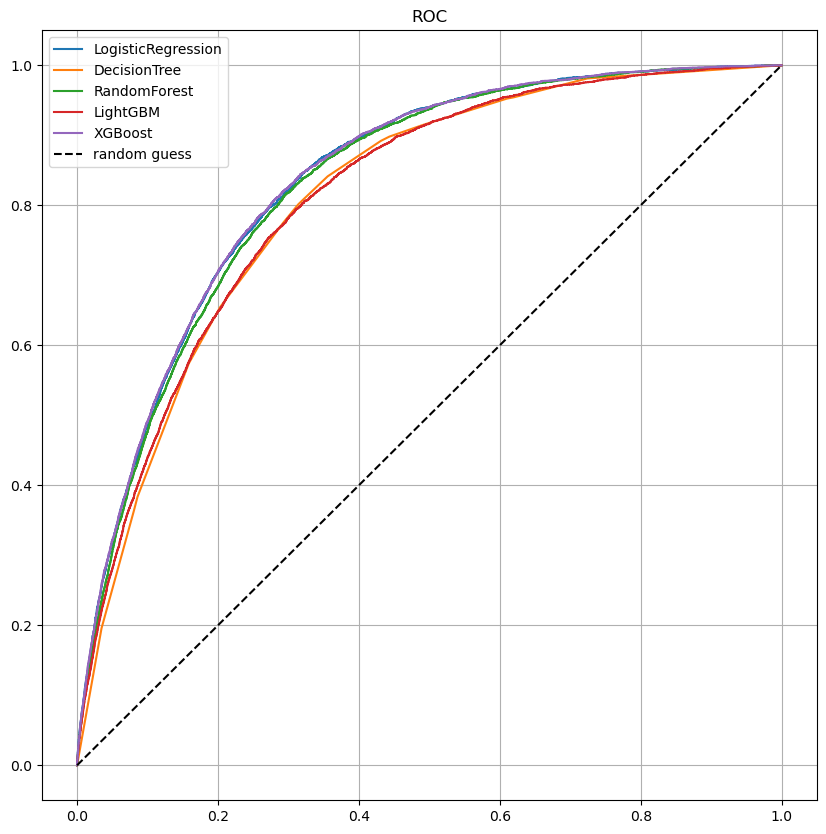

In [360]:
draw_roc_curve(models, model_names, X_test, y_test)

---

In [333]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

In [342]:
# Define the model with default hyperparameters
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [343]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56774
           1       0.21      0.77      0.32      4997

    accuracy                           0.74     61771
   macro avg       0.59      0.75      0.58     61771
weighted avg       0.91      0.74      0.80     61771



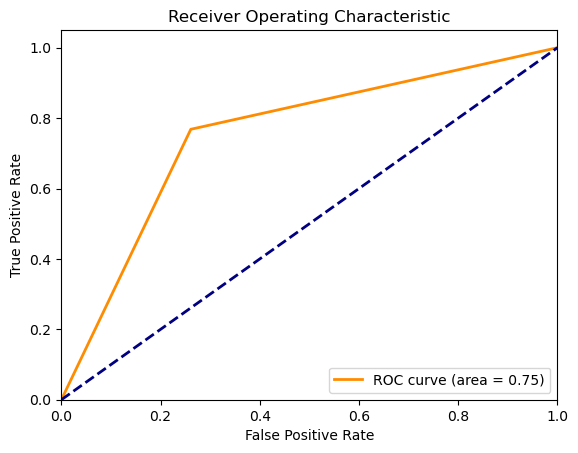

In [339]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()